In [66]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd


In [67]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("../Resources/singapore-motor-vehicle-population.csv")
vehicle_data

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214
...,...,...,...,...
385,2018,Buses,Petrol-Electric,0
386,2018,Buses,Petrol-CNG,0
387,2018,Buses,CNG,12
388,2018,Buses,Electric,4


In [68]:
petrol_e_df = vehicle_data.loc[vehicle_data["engine"] == "Petrol-Electric"]
petrol_e_group = petrol_e_df.groupby("year").sum()

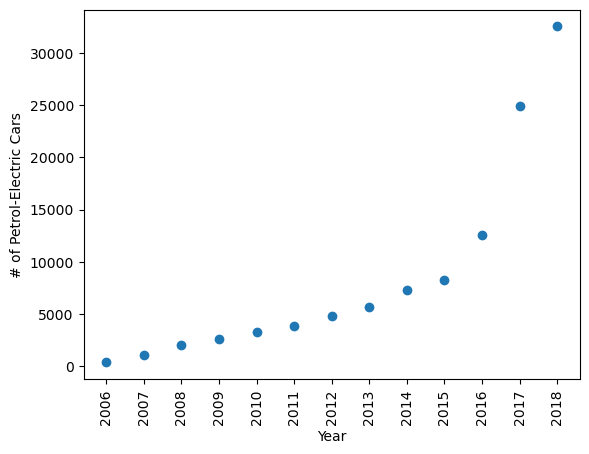

In [69]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values_pe = petrol_e_group.index
y_values_pe = petrol_e_group["number"]
plt.scatter(x_values_pe,y_values_pe)
plt.xlabel("Year")
plt.ylabel("# of Petrol-Electric Cars")
plt.xticks(x_values_pe, rotation = 90)
plt.show()

In [70]:
# Perform a linear regression on year versus petrol-electric cars
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values_pe, y_values_pe)


In [71]:
# Create equation of line to calculate predicted number of petrol-electric cars
line_fit = slope * x_values_pe + intercept
line_eq = (f"y = {str(round(slope,2))}x + {str(round(intercept,2))}")

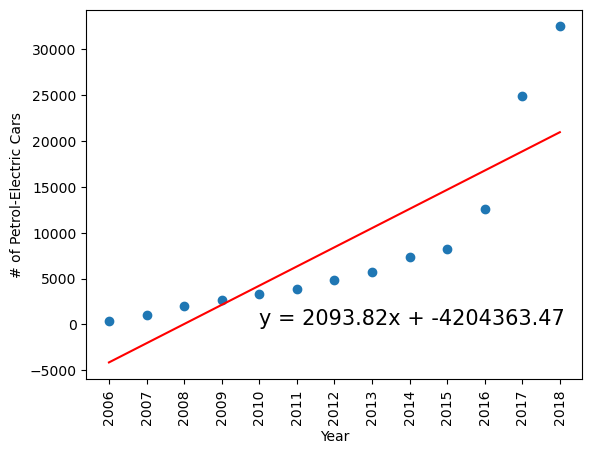

In [72]:
# Plot the linear model on top of scatter plot 

x_values_pe = petrol_e_group.index
y_values_pe = petrol_e_group["number"]
plt.scatter(x_values_pe,y_values_pe)
plt.plot(x_values_pe,line_fit, color = "r")
plt.annotate(line_eq, (2010,0), fontsize = 15)
plt.xlabel("Year")
plt.ylabel("# of Petrol-Electric Cars")
plt.xticks(x_values_pe,rotation = 90)
plt.show()

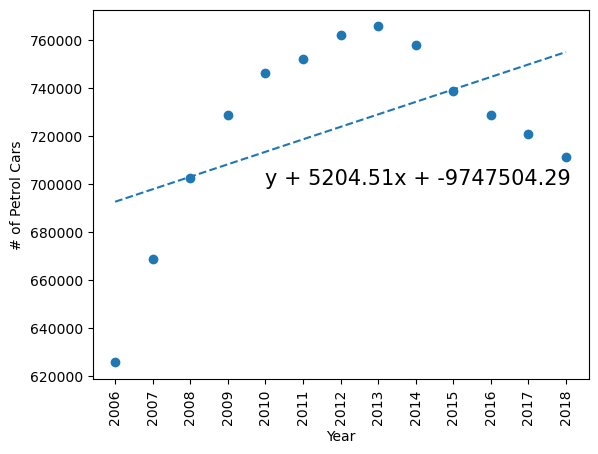

In [73]:
# Repeat plotting scatter and linear model for year versus petrol cars
petrol_df = vehicle_data.loc[vehicle_data["engine"] == "Petrol"]
petrol_group = petrol_df.groupby("year").sum()

x_values_p = petrol_group.index
y_values_p = petrol_group["number"]
slope, intercept, rvalue,pvalue, stderr = stats.linregress(x_values_p,y_values_p)
regress_p = slope * x_values_p + intercept
line_eq = (f"y + {str(round(slope,2))}x + {str(round(intercept,2))}")


plt.scatter(x_values_p,y_values_p)
plt.plot(x_values_p,regress_p, "--")
plt.annotate(line_eq, (2010,700000), fontsize = 15)
plt.xlabel("Year")
plt.ylabel("# of Petrol Cars")
plt.xticks(x_values_p, rotation = 90)
plt.show()

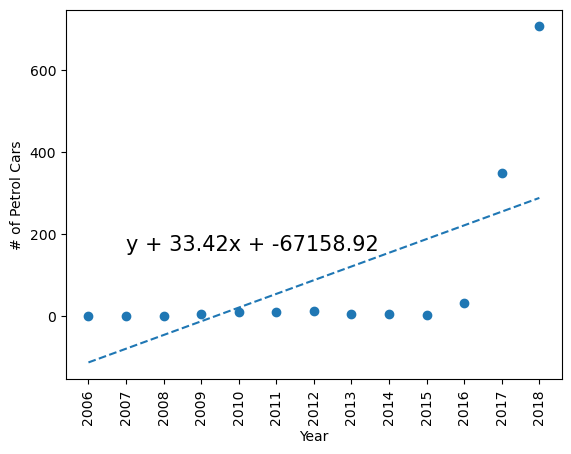

In [74]:
# Repeat plotting scatter and linear model for year versus electric cars
electric_df = vehicle_data.loc[vehicle_data["engine"] == "Electric"]
electric_group = electric_df.groupby("year").sum()

x_values_e = electric_group.index
y_values_e = electric_group["number"]
slope, intercept, rvalue,pvalue, stderr = stats.linregress(x_values_e,y_values_e)
regress_e = slope * x_values_e + intercept
line_eq = (f"y + {str(round(slope,2))}x + {str(round(intercept,2))}")

plt.scatter(x_values_e,y_values_e)
plt.plot(x_values_e,regress_e, "--")
plt.annotate(line_eq, (2007,160), fontsize = 15)
plt.xlabel("Year")
plt.ylabel("# of Petrol Cars")
plt.xticks(x_values_e, rotation = 90)
plt.show()

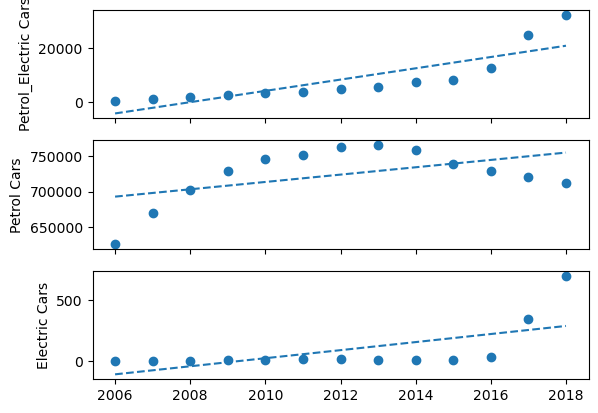

In [83]:
# Generate a facet plot of all 3 figures
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex = True)

ax1.scatter(x_values_pe, y_values_pe)
ax1.plot(x_values_pe,line_fit, "--")
ax1.set_ylabel("Petrol_Electric Cars")

ax2.scatter(x_values_p,y_values_p)
ax2.plot(x_values_p,regress_p, "--")
ax2.set_ylabel("Petrol Cars")

ax3.scatter(x_values_e,y_values_e)
ax3.plot(x_values_e,regress_e, "--")
ax3.set_ylabel("Electric Cars")

plt.show()

In [76]:
# Calculate the number of cars for 2024
pe_cars = line_fit